# **TRAIN & TEST (YOLOv8 MODEL) on PAVEL-AD DATASET**


# **install Required Packages**

In [ ]:
# Install the required libraries
%pip install ultralytics
%pip install matplotlib seaborn pandas opencv-python
!apt-get install unrar


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.6/913.6 kB 22.6 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


# Upload and Extract Dataset

In [ ]:
# Unzip the dataset
import os

!unrar x /content/new_dataset.rar /content/

# Verify extraction
assert os.path.exists('/content/yolo_dataset'), "Dataset extraction failed."
print("Dataset extracted successfully!")



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

Unexpected end of archive

Extracting from /content/new_dataset.rar

Creating    /content/yolo_dataset                                     OK
Creating    /content/yolo_dataset/.idea                               OK
Extracting  /content/yolo_dataset/.idea/.gitignore                         0%  OK 
Creating    /content/yolo_dataset/.idea/inspectionProfiles            OK
Extracting  /content/yolo_dataset/.idea/inspectionProfiles/profiles_settings.xml       0%  OK 
Extracting  /content/yolo_dataset/.idea/misc.xml                           0%  OK 
Extracting  /content/yolo_dataset/.idea/modules.xml                        0%  OK 
Extracting  /content/yolo_dataset/.idea/yolo_dataset.iml                   0%  OK 
Extracting  /content/yolo_dataset/data.yaml                                0%  OK 
Creating    /content/yolo_dataset/images                              OK


# **Import Libraries**

In [ ]:
# Importing required libraries
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import seaborn as sns

# Set seaborn style for plots
sns.set_style('darkgrid')
%matplotlib inline


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Visualize 4 Random Images with Bounding Boxes

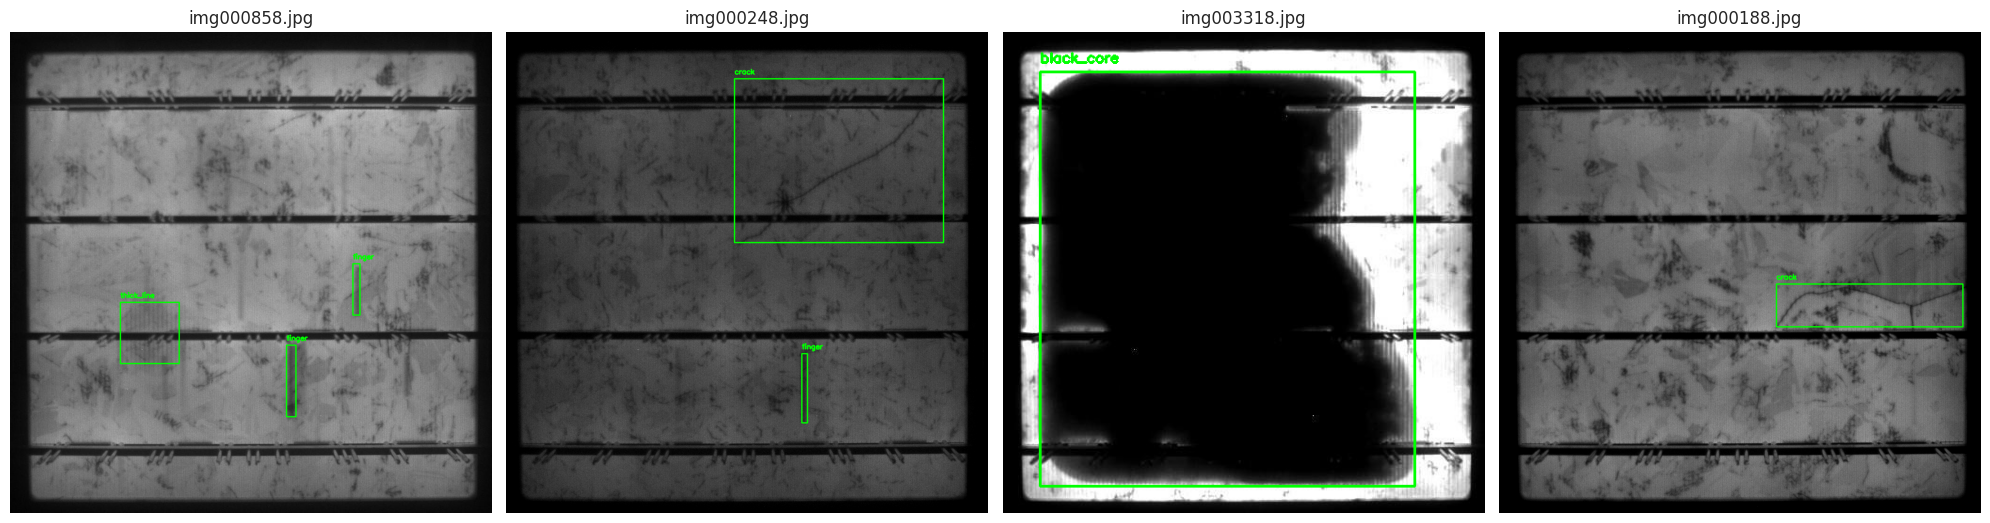

In [ ]:
# Draw bounding boxes
def draw_bounding_boxes(image_path, label_path):
    """Draw bounding boxes on an image."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image {image_path}")
        return None

    h, w, _ = image.shape
    with open(label_path, "r") as f:
        labels = f.readlines()

    for label in labels:
        data = label.strip().split()
        class_id, x_center, y_center, width, height = map(float, data)
        x_min = int((x_center - width / 2) * w)
        y_min = int((y_center - height / 2) * h)
        x_max = int((x_center + width / 2) * w)
        y_max = int((y_center + height / 2) * h)

        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        class_name = class_names[int(class_id)]
        cv2.putText(image, class_name, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Visualize 4 random images
random_images = random.sample(os.listdir(images_folder), 4)

fig, axs = plt.subplots(1, 4, figsize=(20, 10))
for ax, random_image in zip(axs, random_images):
    image_path = os.path.join(images_folder, random_image)
    label_path = os.path.join(labels_folder, random_image.replace(".jpg", ".txt"))

    image_with_boxes = draw_bounding_boxes(image_path, label_path)
    if image_with_boxes is not None:
        ax.imshow(image_with_boxes)
        ax.axis("off")
        ax.set_title(random_image)

plt.tight_layout()
plt.show()


# Load YOLOv8 Model for Training / Train the Model

In [ ]:
# Load the YOLO model
model = YOLO('yolov8n.pt')

# Train the model
model.train(
    data='/content/yolo_dataset/data.yaml',
    epochs=55,
    imgsz=1024,
    batch=16
)


100%|██████████| 6.25M/6.25M [00:00<00:00, 16.5MB/s]


Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/yolo_dataset/data.yaml, epochs=55, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|██████████| 755k/755k [00:00<00:00, 3.10MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/yolo_dataset/labels/train... 3697 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3697/3697 [00:02<00:00, 1312.86it/s]


train: New cache created: /content/yolo_dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/yolo_dataset/labels/val... 457 images, 0 backgrounds, 0 corrupt: 100%|██████████| 457/457 [00:00<00:00, 1589.11it/s]


val: New cache created: /content/yolo_dataset/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 55 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/55         0G      2.087      6.014      2.118         65       1024:  14%|█▍        | 32/232 [22:55<2:09:32, 38.86s/it]

# Evaluate Training Results

In [ ]:
# Validate the YOLO model
metrics = model.val(data="/content/yolo_dataset/data.yaml")
print(metrics)


Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/yolo_dataset/labels/val.cache... 457 images, 0 backgrounds, 0 corrupt: 100%|██████████| 457/457 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.58it/s]


                   all        457        812      0.922      0.877       0.93      0.679
            black_core        102        103      0.981      0.977      0.994      0.972
                corner          4          6      0.955      0.833       0.85      0.671
                 crack        103        127      0.835       0.74      0.855       0.56
                finger        149        298      0.953      0.825      0.957      0.565
              fragment          6          6      0.933          1      0.995      0.841
horizontal_dislocation         26         78          1      0.866      0.995      0.686
        printing_error          1         16      0.976          1      0.995      0.737
               scratch          2          4      0.924          1      0.995      0.495
         short_circuit         49         49          1      0.988      0.995      0.938
            star_crack         10         12      0.674      0.583       0.67      0.491
            thick_lin

# Visualize Training Metrics

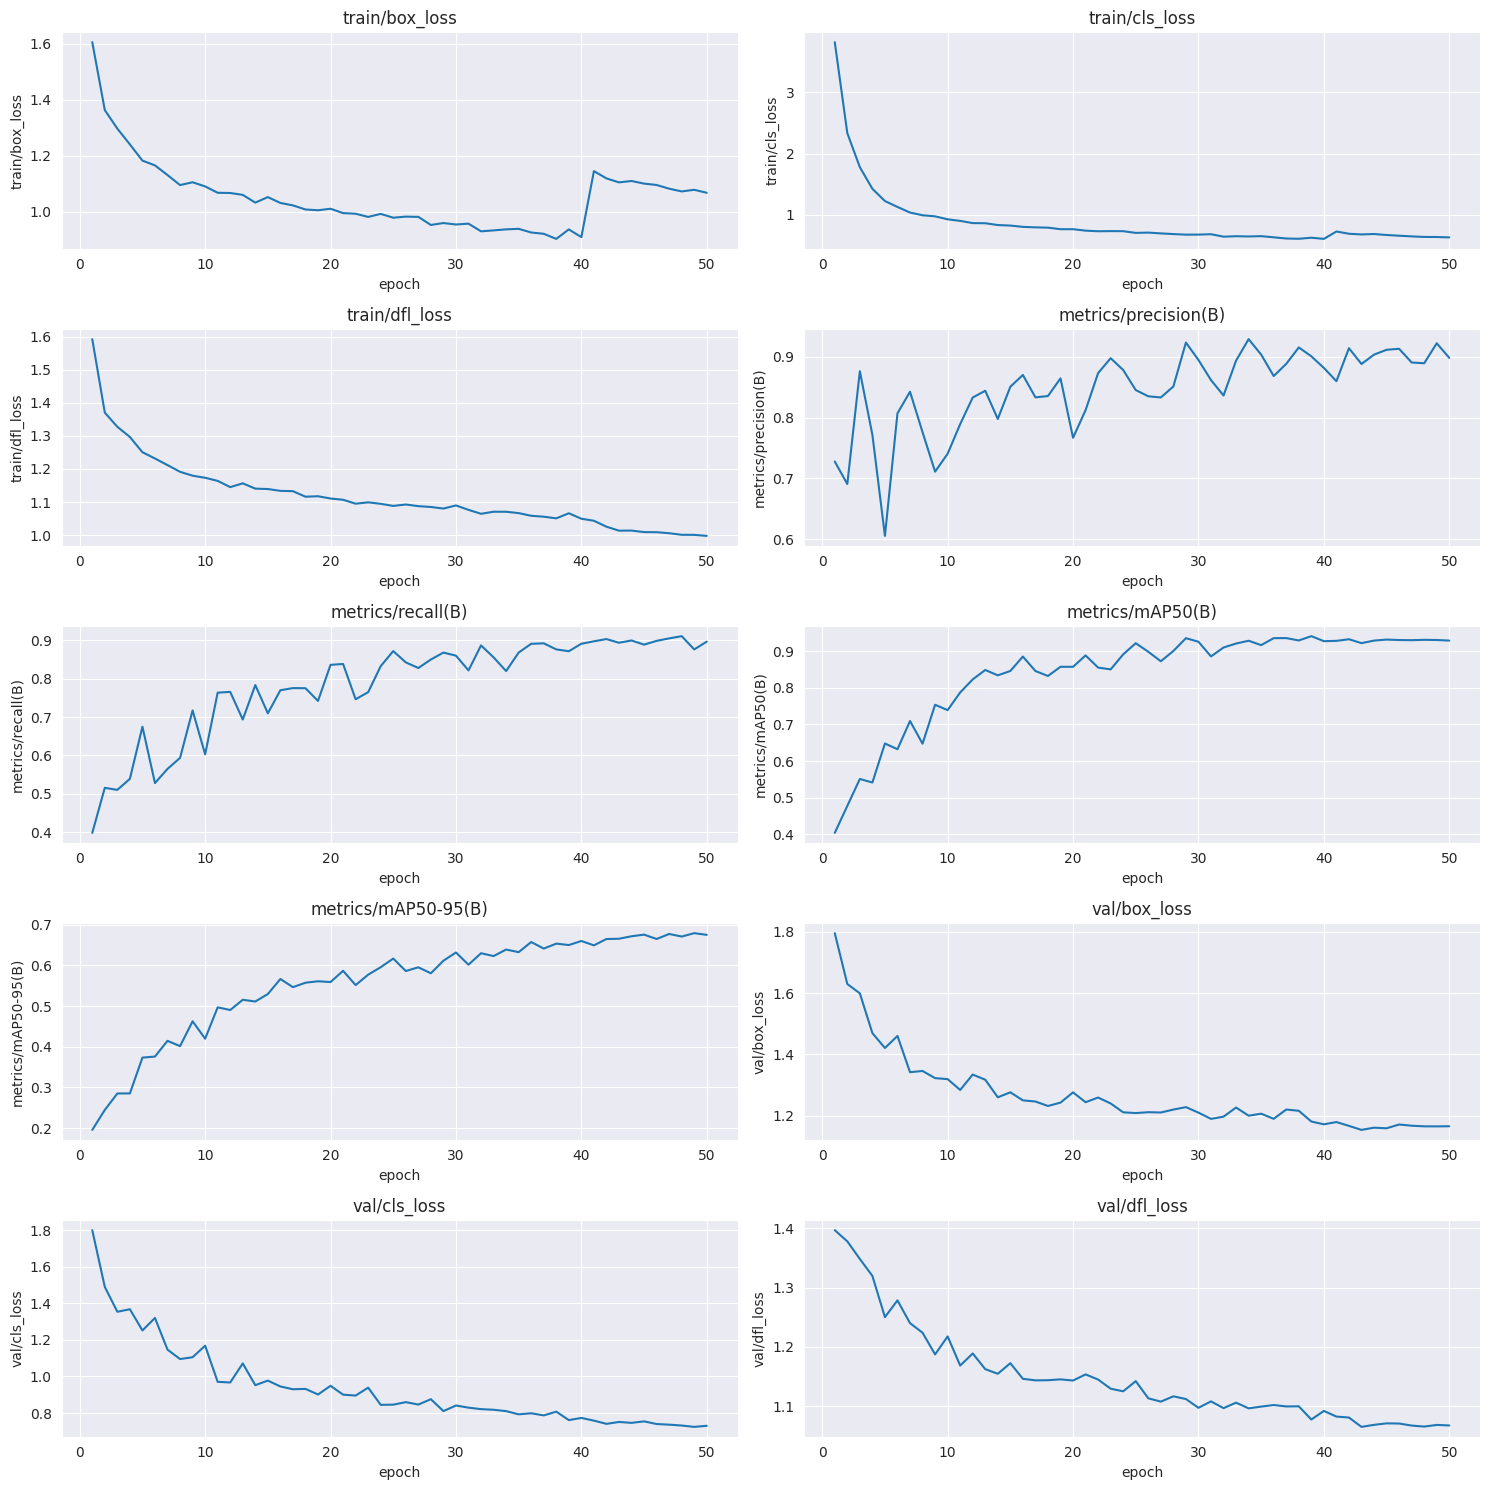

In [ ]:
# Load training metrics
df = pd.read_csv('/content/runs/detect/train/results.csv')

# Create plots for training metrics
fig, axs = plt.subplots(5, 2, figsize=(15, 15))
metrics_to_plot = [
    'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
    'metrics/precision(B)', 'metrics/recall(B)',
    'metrics/mAP50(B)', 'metrics/mAP50-95(B)',
    'val/box_loss', 'val/cls_loss', 'val/dfl_loss'
]

for i, metric in enumerate(metrics_to_plot):
    row, col = divmod(i, 2)
    sns.lineplot(x='epoch', y=metric, data=df, ax=axs[row, col])
    axs[row, col].set_title(metric)

plt.tight_layout()
plt.show()


# Perform Inference


image 1/1 /content/yolo_dataset/images/val/img003225_rotated_left_5_rotated_right_10.jpg: 1024x1024 1 fragment, 13.5ms
Speed: 7.0ms preprocess, 13.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/train3


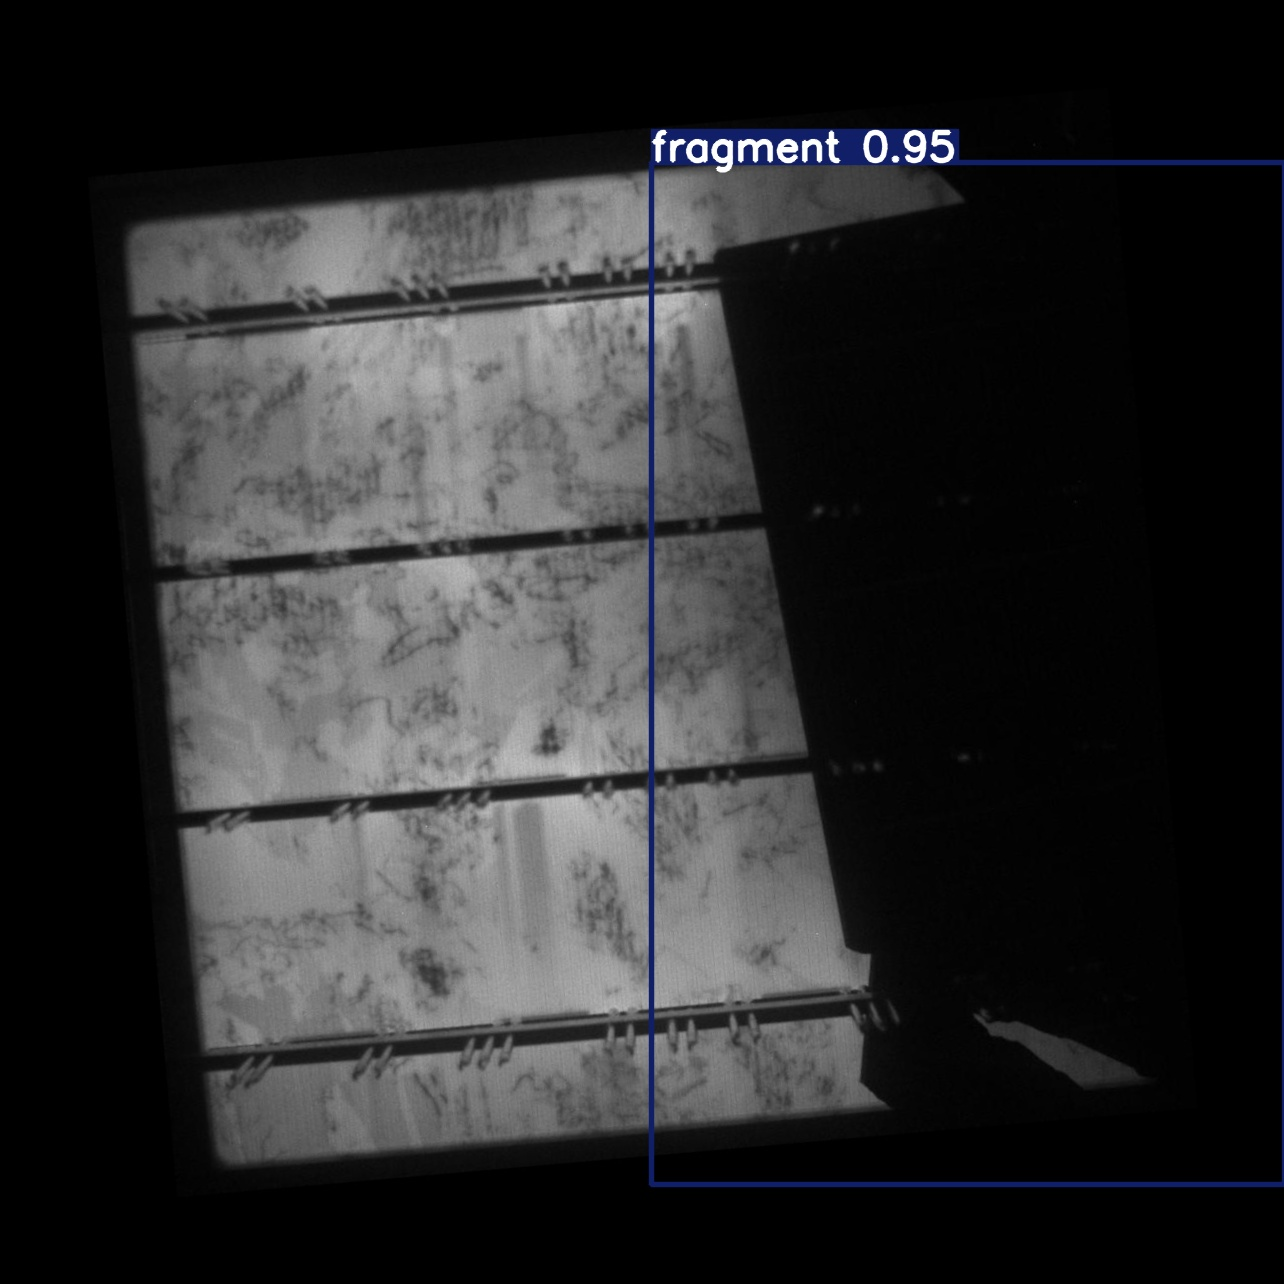

In [ ]:
from IPython.display import Image, display
import os
import glob

# Perform inference on a random test image
test_image_path = "/content/yolo_dataset/images/val/img003225_rotated_left_5_rotated_right_10.jpg"
results = model.predict(source=test_image_path, save=True)  # Save predictions

# Dynamically find the latest prediction directory
prediction_dir = max(glob.glob("runs/detect/*"), key=os.path.getmtime)
predicted_image_path = os.path.join(prediction_dir, os.path.basename(test_image_path))

# Display the saved prediction image
if os.path.exists(predicted_image_path):
    display(Image(filename=predicted_image_path))
else:
    print(f"Prediction image not found: {predicted_image_path}")



# Load the trained model and test it

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/detect/train/weights/best.pt")



image 1/1 /content/yolo_dataset/images/test/img000492.jpg: 1024x1024 3 fingers, 13.4ms
Speed: 3.6ms preprocess, 13.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/detect/predict


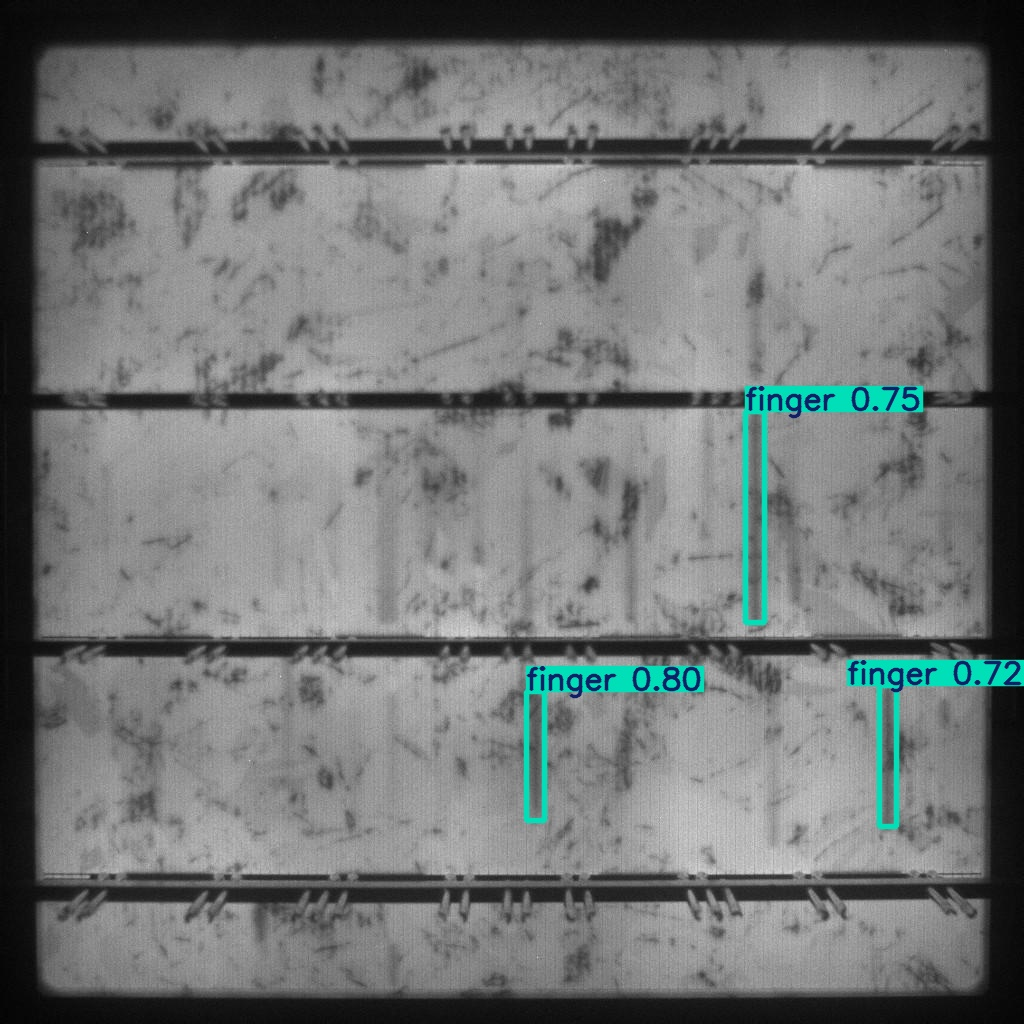

In [ ]:
# Perform inference on a single test image
test_image_path = "/content/yolo_dataset/images/test/img000492.jpg"
results = model.predict(source=test_image_path, save=True)

# Display the saved prediction image
from IPython.display import Image, display
predicted_image_path = f"runs/detect/predict/{test_image_path.split('/')[-1]}"
display(Image(filename=predicted_image_path))


In [ ]:
# Test on all images in the test set directory
test_images_dir = "/content/yolo_dataset/images/test"
results = model.predict(source=test_images_dir, save=True)





image 1/474 /content/yolo_dataset/images/test/img000024.jpg: 1024x1024 1 finger, 13.5ms
image 2/474 /content/yolo_dataset/images/test/img000043.jpg: 1024x1024 1 black_core, 13.4ms
image 3/474 /content/yolo_dataset/images/test/img000068.jpg: 1024x1024 1 crack, 13.5ms
image 4/474 /content/yolo_dataset/images/test/img000073.jpg: 1024x1024 1 black_core, 13.5ms
image 5/474 /content/yolo_dataset/images/test/img000080.jpg: 1024x1024 1 crack, 13.5ms
image 6/474 /content/yolo_dataset/images/test/img000115.jpg: 1024x1024 1 black_core, 13.4ms
image 7/474 /content/yolo_dataset/images/test/img000140.jpg: 1024x1024 1 crack, 13.5ms
image 8/474 /content/yolo_dataset/images/test/img000143.jpg: 1024x1024 1 crack, 1 star_crack, 13.5ms
image 9/474 /content/yolo_dataset/images/test/img000149.jpg: 1024x1024 (no detections), 13.5ms
image 10/474 /content/yolo_dataset/images/test/img000151.jpg: 1024x1024 1 black_core, 13.5ms
image 11/474 /content/yolo_dataset/images/test/img000171.jpg: 1024x1024 1 finger, 13.

In [ ]:
# Validate the model on the test set
metrics = model.val(data="/content/yolo_dataset/data.yaml", split="test")
print(metrics)  # This prints metrics like precision, recall, and mAP


Ultralytics 8.3.54 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/yolo_dataset/labels/test... 474 images, 0 backgrounds, 0 corrupt: 100%|██████████| 474/474 [00:00<00:00, 1239.01it/s]

val: New cache created: /content/yolo_dataset/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  3.86it/s]


                   all        474        867      0.902      0.902      0.938      0.655
            black_core        106        109      0.972      0.972      0.991      0.945
                corner          5          6       0.71          1      0.972      0.616
                 crack         96        129       0.82      0.736      0.834      0.564
                finger        162        294       0.93      0.808      0.945      0.574
              fragment          7          7      0.969          1      0.995      0.626
horizontal_dislocation         28         84          1      0.941      0.994      0.682
        printing_error          3         48      0.987          1      0.995      0.757
               scratch          4          6      0.901      0.833      0.888      0.488
         short_circuit         50         50      0.984          1      0.995      0.928
            star_crack         14         15      0.743      0.733      0.764      0.481
            thick_lin

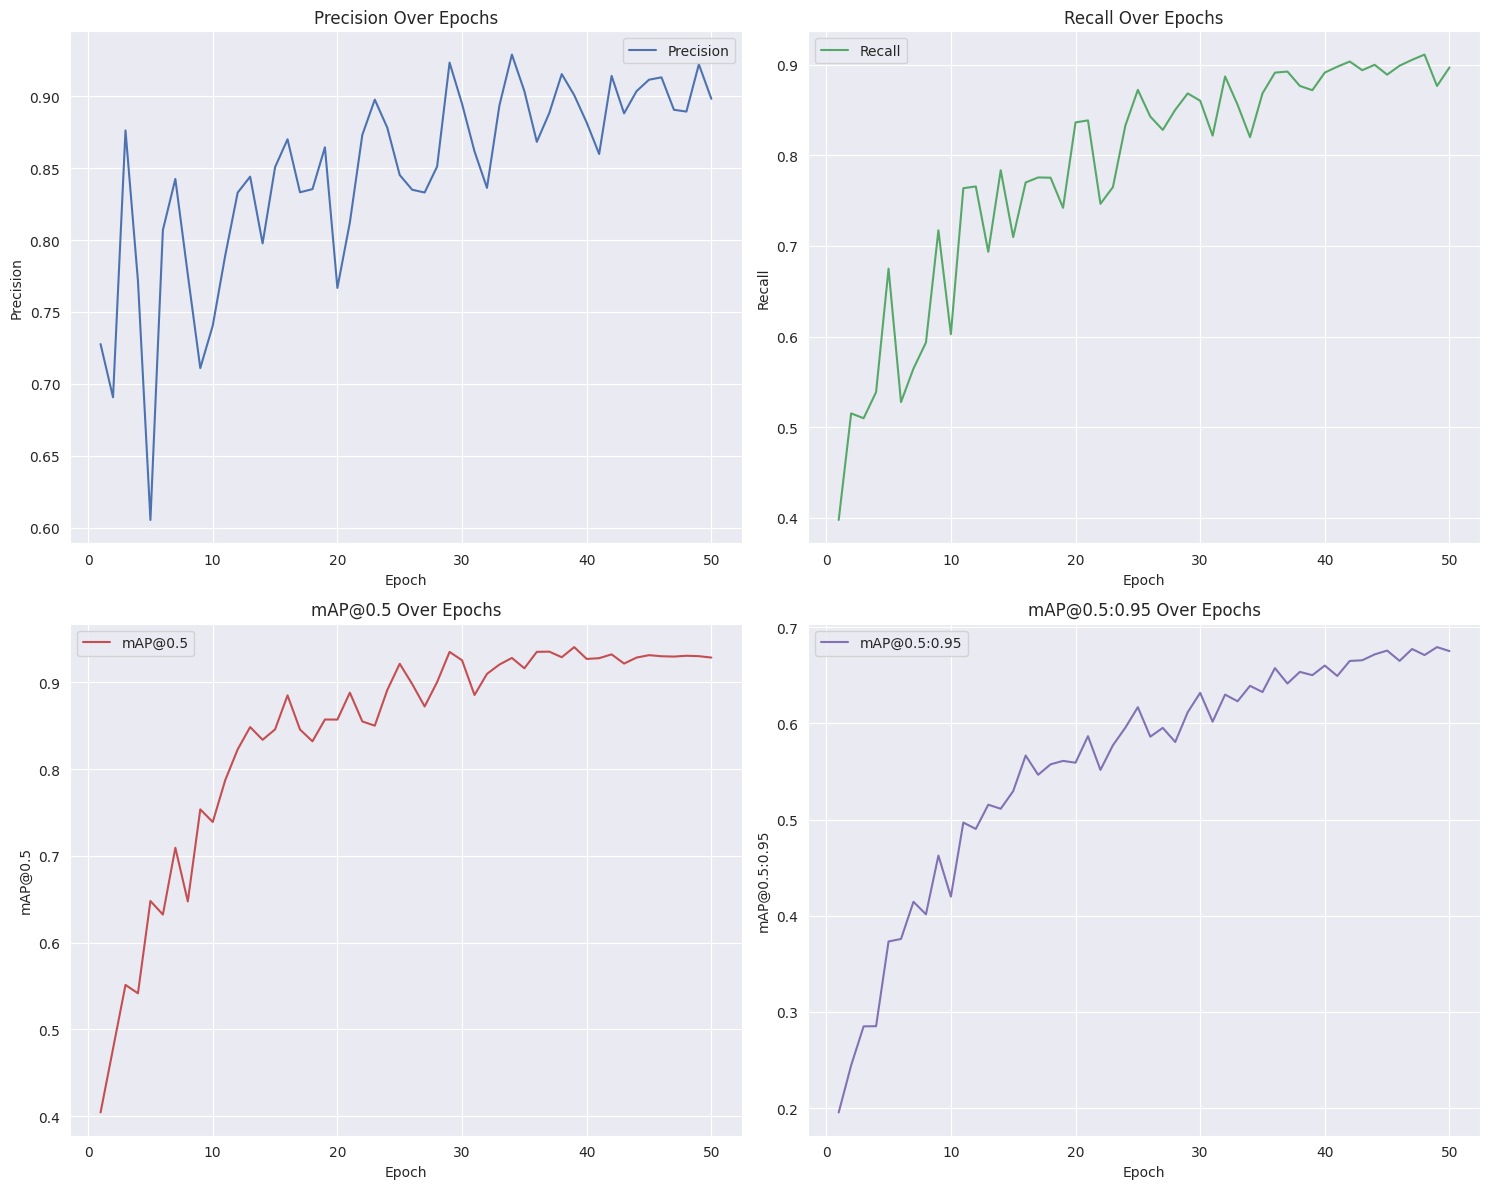

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


results_csv_path = "runs/detect/train/results.csv"

# Load and plot metrics
df = pd.read_csv(results_csv_path)

# Plot metrics
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Precision and Recall
axs[0, 0].plot(df["epoch"], df["metrics/precision(B)"], label="Precision", color="b")
axs[0, 0].set_title("Precision Over Epochs")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Precision")
axs[0, 0].legend()

axs[0, 1].plot(df["epoch"], df["metrics/recall(B)"], label="Recall", color="g")
axs[0, 1].set_title("Recall Over Epochs")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Recall")
axs[0, 1].legend()

# mAP@0.5 and mAP@0.5:0.95
axs[1, 0].plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@0.5", color="r")
axs[1, 0].set_title("mAP@0.5 Over Epochs")
axs[1, 0].set_xlabel("Epoch")
axs[1, 0].set_ylabel("mAP@0.5")
axs[1, 0].legend()

axs[1, 1].plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95", color="m")
axs[1, 1].set_title("mAP@0.5:0.95 Over Epochs")
axs[1, 1].set_xlabel("Epoch")
axs[1, 1].set_ylabel("mAP@0.5:0.95")
axs[1, 1].legend()

plt.tight_layout()
plt.show()


# Display 4 Random Images with Ground Truth and Predicted Boxes + Accuracy


image 1/1 /content/yolo_dataset/images/test/img001621.jpg: 1024x1024 5 fingers, 13.4ms
Speed: 3.6ms preprocess, 13.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


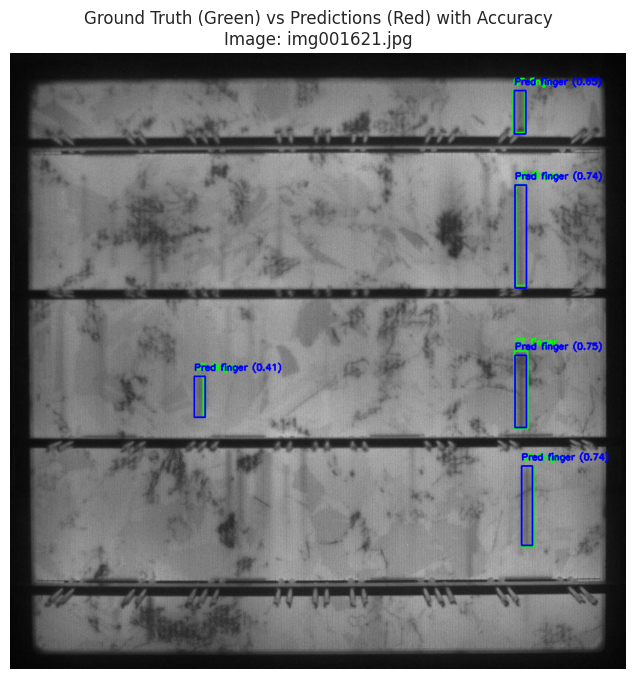

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

# Paths to test images and labels
test_images_path = "/content/yolo_dataset/images/test"  # Path to test images
test_labels_path = "/content/yolo_dataset/labels/test"  # Path to test labels
model_path = "runs/detect/train/weights/best.pt"        # Path to trained YOLO model

# Class names (from data.yaml)
class_names = [
    "black_core", "corner", "crack", "finger", "fragment",
    "horizontal_dislocation", "printing_error", "scratch",
    "short_circuit", "star_crack", "thick_line", "vertical_dislocation"
]

# Function to load ground truth bounding boxes
def load_ground_truth(label_path, image_shape):
    """Load ground truth bounding boxes from YOLO format labels."""
    bboxes = []
    with open(label_path, "r") as file:
        for line in file:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            x1 = int((x_center - width / 2) * image_shape[1])
            y1 = int((y_center - height / 2) * image_shape[0])
            x2 = int((x_center + width / 2) * image_shape[1])
            y2 = int((y_center + height / 2) * image_shape[0])
            bboxes.append({"bbox": [x1, y1, x2, y2], "class_id": int(class_id)})
    return bboxes

# Function to draw bounding boxes
def draw_boxes(image, boxes, color, label_prefix):
    """Draw bounding boxes with labels and confidence scores."""
    for box in boxes:
        x1, y1, x2, y2 = box["bbox"]
        class_name = class_names[box["class_id"]]
        confidence = box.get("confidence", None)  # Predicted confidence if available

        # Draw rectangle
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

        # Display label and confidence
        label = f"{label_prefix} {class_name}"
        if confidence is not None:
            label += f" ({confidence:.2f})"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Select a random test image
random_image_name = random.choice(os.listdir(test_images_path))
test_image_path = os.path.join(test_images_path, random_image_name)
label_path = os.path.join(test_labels_path, random_image_name.replace(".jpg", ".txt"))

# Load the image
image = cv2.imread(test_image_path)
original_image = image.copy()  # Copy for visualization
image_shape = image.shape

# Load ground truth bounding boxes
ground_truth_boxes = load_ground_truth(label_path, image_shape)

# Load YOLO model and perform prediction
model = YOLO(model_path)
results = model.predict(source=test_image_path, save=False, conf=0.2)
predicted_boxes = []

# Process predictions
for box in results[0].boxes.data.tolist():
    x1, y1, x2, y2, conf, class_id = box
    predicted_boxes.append({
        "bbox": [int(x1), int(y1), int(x2), int(y2)],
        "class_id": int(class_id),
        "confidence": float(conf)
    })

# Draw ground truth and predicted boxes
draw_boxes(original_image, ground_truth_boxes, (0, 255, 0), "GT")    # Green for ground truth
draw_boxes(original_image, predicted_boxes, (255, 0, 0), "Pred")    # Red for predictions

# Display the image with both bounding boxes
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title(f"Ground Truth (Green) vs Predictions (Red) with Accuracy\nImage: {random_image_name}")
plt.axis("off")
plt.show()


# Compute overall evaluation metrics

In [ ]:
import os
from sklearn.metrics import precision_recall_fscore_support, average_precision_score
import numpy as np
from ultralytics import YOLO
import cv2

# Function to compute IoU (Intersection over Union)
def compute_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    area_box1 = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    area_box2 = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    union = area_box1 + area_box2 - intersection

    return intersection / union if union > 0 else 0

# Function to match predictions with ground truth
def match_predictions(predicted_boxes, ground_truth_boxes, iou_threshold=0.5):
    matched_gt = set()
    y_true = []
    y_pred = []

    for pred_box in predicted_boxes:
        best_iou = 0
        best_gt = None

        for idx, gt_box in enumerate(ground_truth_boxes):
            if idx not in matched_gt:
                iou = compute_iou(pred_box["bbox"], gt_box["bbox"])
                if iou > best_iou:
                    best_iou = iou
                    best_gt = idx

        if best_iou >= iou_threshold and best_gt is not None:
            matched_gt.add(best_gt)
            y_true.append(1)  # True Positive
            y_pred.append(1)
        else:
            y_true.append(0)  # False Positive
            y_pred.append(1)

    # Remaining ground truth boxes are False Negatives
    for _ in range(len(ground_truth_boxes) - len(matched_gt)):
        y_true.append(1)
        y_pred.append(0)

    return y_true, y_pred

# Function to load ground truth bounding boxes
def load_ground_truth(label_path, image_shape):
    """Load ground truth bounding boxes from YOLO format labels."""
    bboxes = []
    with open(label_path, "r") as file:
        for line in file:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            x1 = int((x_center - width / 2) * image_shape[1])
            y1 = int((y_center - height / 2) * image_shape[0])
            x2 = int((x_center + width / 2) * image_shape[1])
            y2 = int((y_center + height / 2) * image_shape[0])
            bboxes.append({"bbox": [x1, y1, x2, y2], "class_id": int(class_id)})
    return bboxes

# Paths to test images and labels
test_images_path = "/content/yolo_dataset/images/test"
test_labels_path = "/content/yolo_dataset/labels/test"
model_path = "runs/detect/train/weights/best.pt"

# Load the YOLO model
model = YOLO(model_path)

# Initialize variables to collect all true and predicted labels
all_y_true = []
all_y_pred = []

# Process all images in the test dataset
for image_name in os.listdir(test_images_path):
    if not image_name.endswith(".jpg"):
        continue

    # Image and label paths
    image_path = os.path.join(test_images_path, image_name)
    label_path = os.path.join(test_labels_path, image_name.replace(".jpg", ".txt"))

    # Load image and ground truth
    image = cv2.imread(image_path)
    image_shape = image.shape
    ground_truth_boxes = load_ground_truth(label_path, image_shape)

    # Get predictions from the model
    results = model.predict(source=image_path, save=False, conf=0.2)
    predicted_boxes = []
    for box in results[0].boxes.data.tolist():
        x1, y1, x2, y2, conf, class_id = box
        predicted_boxes.append({
            "bbox": [int(x1), int(y1), int(x2), int(y2)],
            "class_id": int(class_id),
            "confidence": float(conf)
        })

    # Match predictions with ground truth
    y_true, y_pred = match_predictions(predicted_boxes, ground_truth_boxes)
    all_y_true.extend(y_true)
    all_y_pred.extend(y_pred)

# Compute overall evaluation metrics
precision, recall, f1_score, _ = precision_recall_fscore_support(all_y_true, all_y_pred, average='binary')
mean_average_precision = average_precision_score(all_y_true, all_y_pred)

# Print overall metrics
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1_score:.4f}")
print(f"Overall Mean Average Precision (mAP): {mean_average_precision:.4f}")



image 1/1 /content/yolo_dataset/images/test/img001694.jpg: 1024x1024 1 finger, 13.3ms
Speed: 3.6ms preprocess, 13.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /content/yolo_dataset/images/test/img000860.jpg: 1024x1024 2 cracks, 4 fingers, 13.4ms
Speed: 4.4ms preprocess, 13.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /content/yolo_dataset/images/test/img002926.jpg: 1024x1024 1 thick_line, 13.4ms
Speed: 3.4ms preprocess, 13.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /content/yolo_dataset/images/test/img002468.jpg: 1024x1024 1 thick_line, 13.4ms
Speed: 3.4ms preprocess, 13.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /content/yolo_dataset/images/test/img021963.jpg: 1024x1024 1 short_circuit, 13.3ms
Speed: 3.2ms preprocess, 13.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /content/yolo_dataset/images/test

# Download the runs file

In [ ]:
import shutil


source_folder = "/content/runs"
output_zip = "/content/runs_output.zip"

# Zip the folder
shutil.make_archive(output_zip.replace(".zip", ""), 'zip', source_folder)

print(f"Folder zipped successfully: {output_zip}")


Folder zipped successfully: /content/runs_output.zip


# Test the trained model in selected image


0: 1024x1024 1 finger, 16 printing_errors, 7.5ms
Speed: 8.2ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


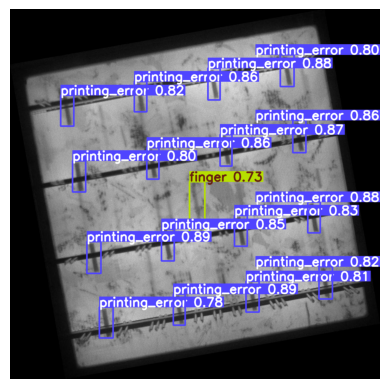

In [ ]:
from ultralytics import YOLO
from PIL import Image

# Load the YOLOv8 model
model = YOLO("/content/best (8).pt")

# Load a test image
image = Image.open("/content/yolo1.jpg")

# Run inference
results = model.predict(image, conf=0.25)

# Display the predictions for the first result
results[0].plot()  # This draws bounding boxes on the image and saves it

# To directly display the modified image
import matplotlib.pyplot as plt
plt.imshow(results[0].plot())  # Show the image with predictions
plt.axis("off")
plt.show()


# Fine Tunning

In [ ]:
from ultralytics import YOLO

# Load the fine-tuned model
model = YOLO('/content/best (6).pt')

# Restart fine-tuning
model.train(
    data='/content/yolo_dataset/data.yaml',  # Path to dataset configuration
    epochs=30,                               # Fine-tune for 30 more epochs
    imgsz=1024,                              # Image size
    lr0=0.0001,                              # Lower learning rate for fine-tuning
    batch=16,                                # Batch size
    name='fine_tune_best'                    # New run name
)


Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/best (6).pt, data=/content/yolo_dataset/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=fine_tune_best, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

train: Scanning /content/yolo_dataset/labels/train.cache... 3697 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3697/3697 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/yolo_dataset/labels/val.cache... 457 images, 0 backgrounds, 0 corrupt: 100%|██████████| 457/457 [00:00<?, ?it/s]


Plotting labels to runs/detect/fine_tune_best/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to runs/detect/fine_tune_best
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      5.56G     0.9088     0.6111      1.049          3       1024: 100%|██████████| 232/232 [01:15<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.60it/s]

                   all        457        812      0.865      0.888      0.916      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       5.3G     0.9401      0.647      1.065          2       1024: 100%|██████████| 232/232 [00:32<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.82it/s]

                   all        457        812      0.843      0.837      0.892      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.29G     0.9709     0.6893      1.083         10       1024: 100%|██████████| 232/232 [00:31<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.40it/s]

                   all        457        812       0.85      0.775      0.886      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       5.3G     0.9912     0.7029      1.096          2       1024: 100%|██████████| 232/232 [00:31<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.40it/s]

                   all        457        812      0.808      0.858      0.891      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.35G      0.978     0.6985      1.086          1       1024: 100%|██████████| 232/232 [00:31<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.40it/s]

                   all        457        812      0.822      0.866       0.91      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30       5.3G     0.9857     0.6853      1.093          1       1024: 100%|██████████| 232/232 [00:31<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.74it/s]

                   all        457        812      0.846      0.849      0.885      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.35G     0.9689      0.681      1.088          5       1024: 100%|██████████| 232/232 [00:31<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.58it/s]

                   all        457        812      0.877      0.808      0.893      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.29G     0.9493     0.6644       1.08          6       1024: 100%|██████████| 232/232 [00:31<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.29it/s]

                   all        457        812      0.755      0.788      0.837      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.36G     0.9552     0.6606      1.074          2       1024: 100%|██████████| 232/232 [00:31<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.48it/s]

                   all        457        812      0.839      0.783      0.851      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.29G     0.9575     0.6562      1.072          1       1024: 100%|██████████| 232/232 [00:31<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.54it/s]

                   all        457        812       0.89      0.883      0.928      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       5.3G     0.9433      0.648       1.07          7       1024: 100%|██████████| 232/232 [00:31<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.62it/s]

                   all        457        812      0.856      0.856      0.903      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.31G     0.9457     0.6445      1.062          4       1024: 100%|██████████| 232/232 [00:31<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.21it/s]

                   all        457        812      0.909      0.826      0.912      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       5.3G     0.9455     0.6472      1.069          1       1024: 100%|██████████| 232/232 [00:31<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.59it/s]

                   all        457        812      0.905       0.85      0.915      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.31G     0.9191      0.621      1.061          1       1024: 100%|██████████| 232/232 [00:31<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.43it/s]

                   all        457        812      0.877      0.869      0.917      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       5.3G      0.935      0.624      1.063          5       1024: 100%|██████████| 232/232 [00:31<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.76it/s]

                   all        457        812      0.821      0.853      0.895      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      5.35G     0.9175     0.6253      1.053          1       1024: 100%|██████████| 232/232 [00:31<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.64it/s]

                   all        457        812      0.918       0.85      0.929      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30       5.3G     0.9116     0.6095      1.055          3       1024: 100%|██████████| 232/232 [00:31<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.38it/s]

                   all        457        812      0.906      0.873      0.932      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      5.35G     0.8985        0.6      1.043         12       1024: 100%|██████████| 232/232 [00:31<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.27it/s]

                   all        457        812      0.902       0.87      0.929      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       5.3G     0.8927     0.5896      1.043          1       1024: 100%|██████████| 232/232 [00:31<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.90it/s]

                   all        457        812      0.899       0.85      0.914      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30       5.3G     0.8992     0.5972      1.038          3       1024: 100%|██████████| 232/232 [00:31<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.82it/s]

                   all        457        812      0.892      0.846      0.914      0.658


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.88G      1.128     0.6917      1.033          4       1024: 100%|██████████| 232/232 [00:32<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.29it/s]

                   all        457        812       0.86      0.886      0.919      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.26G      1.099     0.6694      1.014          1       1024: 100%|██████████| 232/232 [00:30<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.30it/s]

                   all        457        812      0.898      0.871      0.928      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      5.26G      1.095     0.6611      1.013          1       1024: 100%|██████████| 232/232 [00:30<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.67it/s]

                   all        457        812      0.914      0.894      0.932      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      5.26G       1.09     0.6496     0.9975          3       1024: 100%|██████████| 232/232 [00:30<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.71it/s]

                   all        457        812      0.916      0.886      0.929      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       5.3G      1.069     0.6254     0.9916          1       1024: 100%|██████████| 232/232 [00:30<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.54it/s]

                   all        457        812      0.925      0.873       0.93      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.26G      1.063     0.6152     0.9884          1       1024: 100%|██████████| 232/232 [00:30<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.50it/s]

                   all        457        812      0.913      0.909      0.932      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.26G      1.038     0.6067     0.9773          0       1024: 100%|██████████| 232/232 [00:30<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.48it/s]

                   all        457        812      0.925      0.893      0.931      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.29G      1.032     0.5888     0.9712          2       1024: 100%|██████████| 232/232 [00:30<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.91it/s]

                   all        457        812      0.903      0.905      0.931      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      5.28G      1.039       0.59     0.9764          1       1024: 100%|██████████| 232/232 [00:30<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.74it/s]

                   all        457        812      0.912      0.892      0.933      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      5.28G      1.021     0.5762     0.9717          1       1024: 100%|██████████| 232/232 [00:31<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  6.46it/s]

                   all        457        812      0.912      0.897      0.936      0.684



30 epochs completed in 0.300 hours.
Optimizer stripped from runs/detect/fine_tune_best/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/fine_tune_best/weights/best.pt, 6.3MB

Validating runs/detect/fine_tune_best/weights/best.pt...
Ultralytics 8.3.61 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.62it/s]


                   all        457        812      0.912      0.897      0.936      0.685
            black_core        102        103      0.985      0.981      0.995      0.976
                corner          4          6      0.918      0.833      0.869      0.624
                 crack        103        127      0.821       0.78      0.843      0.568
                finger        149        298      0.928      0.871      0.959      0.569
              fragment          6          6      0.926          1      0.995      0.804
horizontal_dislocation         26         78          1      0.986      0.995       0.68
        printing_error          1         16      0.972          1      0.995      0.766
               scratch          2          4      0.921          1      0.995      0.561
         short_circuit         49         49      0.997          1      0.995      0.924
            star_crack         10         12      0.733      0.686      0.752      0.534
            thick_lin

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aa4e8771db0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,  

# Test the FineTuned Model

In [ ]:
import os
from sklearn.metrics import precision_recall_fscore_support, average_precision_score
import numpy as np
from ultralytics import YOLO
import cv2

# Function to compute IoU (Intersection over Union)
def compute_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    area_box1 = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    area_box2 = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    union = area_box1 + area_box2 - intersection

    return intersection / union if union > 0 else 0

# Function to match predictions with ground truth
def match_predictions(predicted_boxes, ground_truth_boxes, iou_threshold=0.5):
    matched_gt = set()
    y_true = []
    y_pred = []

    for pred_box in predicted_boxes:
        best_iou = 0
        best_gt = None

        for idx, gt_box in enumerate(ground_truth_boxes):
            if idx not in matched_gt:
                iou = compute_iou(pred_box["bbox"], gt_box["bbox"])
                if iou > best_iou:
                    best_iou = iou
                    best_gt = idx

        if best_iou >= iou_threshold and best_gt is not None:
            matched_gt.add(best_gt)
            y_true.append(1)  # True Positive
            y_pred.append(1)
        else:
            y_true.append(0)  # False Positive
            y_pred.append(1)

    # Remaining ground truth boxes are False Negatives
    for _ in range(len(ground_truth_boxes) - len(matched_gt)):
        y_true.append(1)
        y_pred.append(0)

    return y_true, y_pred

# Function to load ground truth bounding boxes
def load_ground_truth(label_path, image_shape):
    """Load ground truth bounding boxes from YOLO format labels."""
    bboxes = []
    with open(label_path, "r") as file:
        for line in file:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            x1 = int((x_center - width / 2) * image_shape[1])
            y1 = int((y_center - height / 2) * image_shape[0])
            x2 = int((x_center + width / 2) * image_shape[1])
            y2 = int((y_center + height / 2) * image_shape[0])
            bboxes.append({"bbox": [x1, y1, x2, y2], "class_id": int(class_id)})
    return bboxes

# Paths to test images and labels and model
test_images_path = "/content/yolo_dataset/images/test"
test_labels_path = "/content/yolo_dataset/labels/test"
model_path = "/content/runs/detect/fine_tune_best/weights/best.pt"

# Load the YOLO model
model = YOLO(model_path)

# Initialize variables to collect all true and predicted labels
all_y_true = []
all_y_pred = []

# Process all images in the test dataset
for image_name in os.listdir(test_images_path):
    if not image_name.endswith(".jpg"):
        continue

    # Image and label paths
    image_path = os.path.join(test_images_path, image_name)
    label_path = os.path.join(test_labels_path, image_name.replace(".jpg", ".txt"))

    # Load image and ground truth
    image = cv2.imread(image_path)
    image_shape = image.shape
    ground_truth_boxes = load_ground_truth(label_path, image_shape)

    # Get predictions from the model
    results = model.predict(source=image_path, save=False, conf=0.25)
    predicted_boxes = []
    for box in results[0].boxes.data.tolist():
        x1, y1, x2, y2, conf, class_id = box
        predicted_boxes.append({
            "bbox": [int(x1), int(y1), int(x2), int(y2)],
            "class_id": int(class_id),
            "confidence": float(conf)
        })

    # Match predictions with ground truth
    y_true, y_pred = match_predictions(predicted_boxes, ground_truth_boxes)
    all_y_true.extend(y_true)
    all_y_pred.extend(y_pred)

# Compute overall evaluation metrics
precision, recall, f1_score, _ = precision_recall_fscore_support(all_y_true, all_y_pred, average='binary')
mean_average_precision = average_precision_score(all_y_true, all_y_pred)

# Print overall metrics
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall: {recall:.4f}")
print(f"Overall F1 Score: {f1_score:.4f}")
print(f"Overall Mean Average Precision (mAP): {mean_average_precision:.4f}")



image 1/1 /content/yolo_dataset/images/test/img002375.jpg: 1024x1024 2 cracks, 1 finger, 8.7ms
Speed: 3.8ms preprocess, 8.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /content/yolo_dataset/images/test/img023285.jpg: 1024x1024 1 short_circuit, 8.3ms
Speed: 5.3ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /content/yolo_dataset/images/test/img003550.jpg: 1024x1024 1 black_core, 7.7ms
Speed: 3.5ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /content/yolo_dataset/images/test/img003220_rotated_left_10.jpg: 1024x1024 1 fragment, 8.0ms
Speed: 6.7ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /content/yolo_dataset/images/test/img021224.jpg: 1024x1024 3 horizontal_dislocations, 7.8ms
Speed: 3.7ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /content/yolo

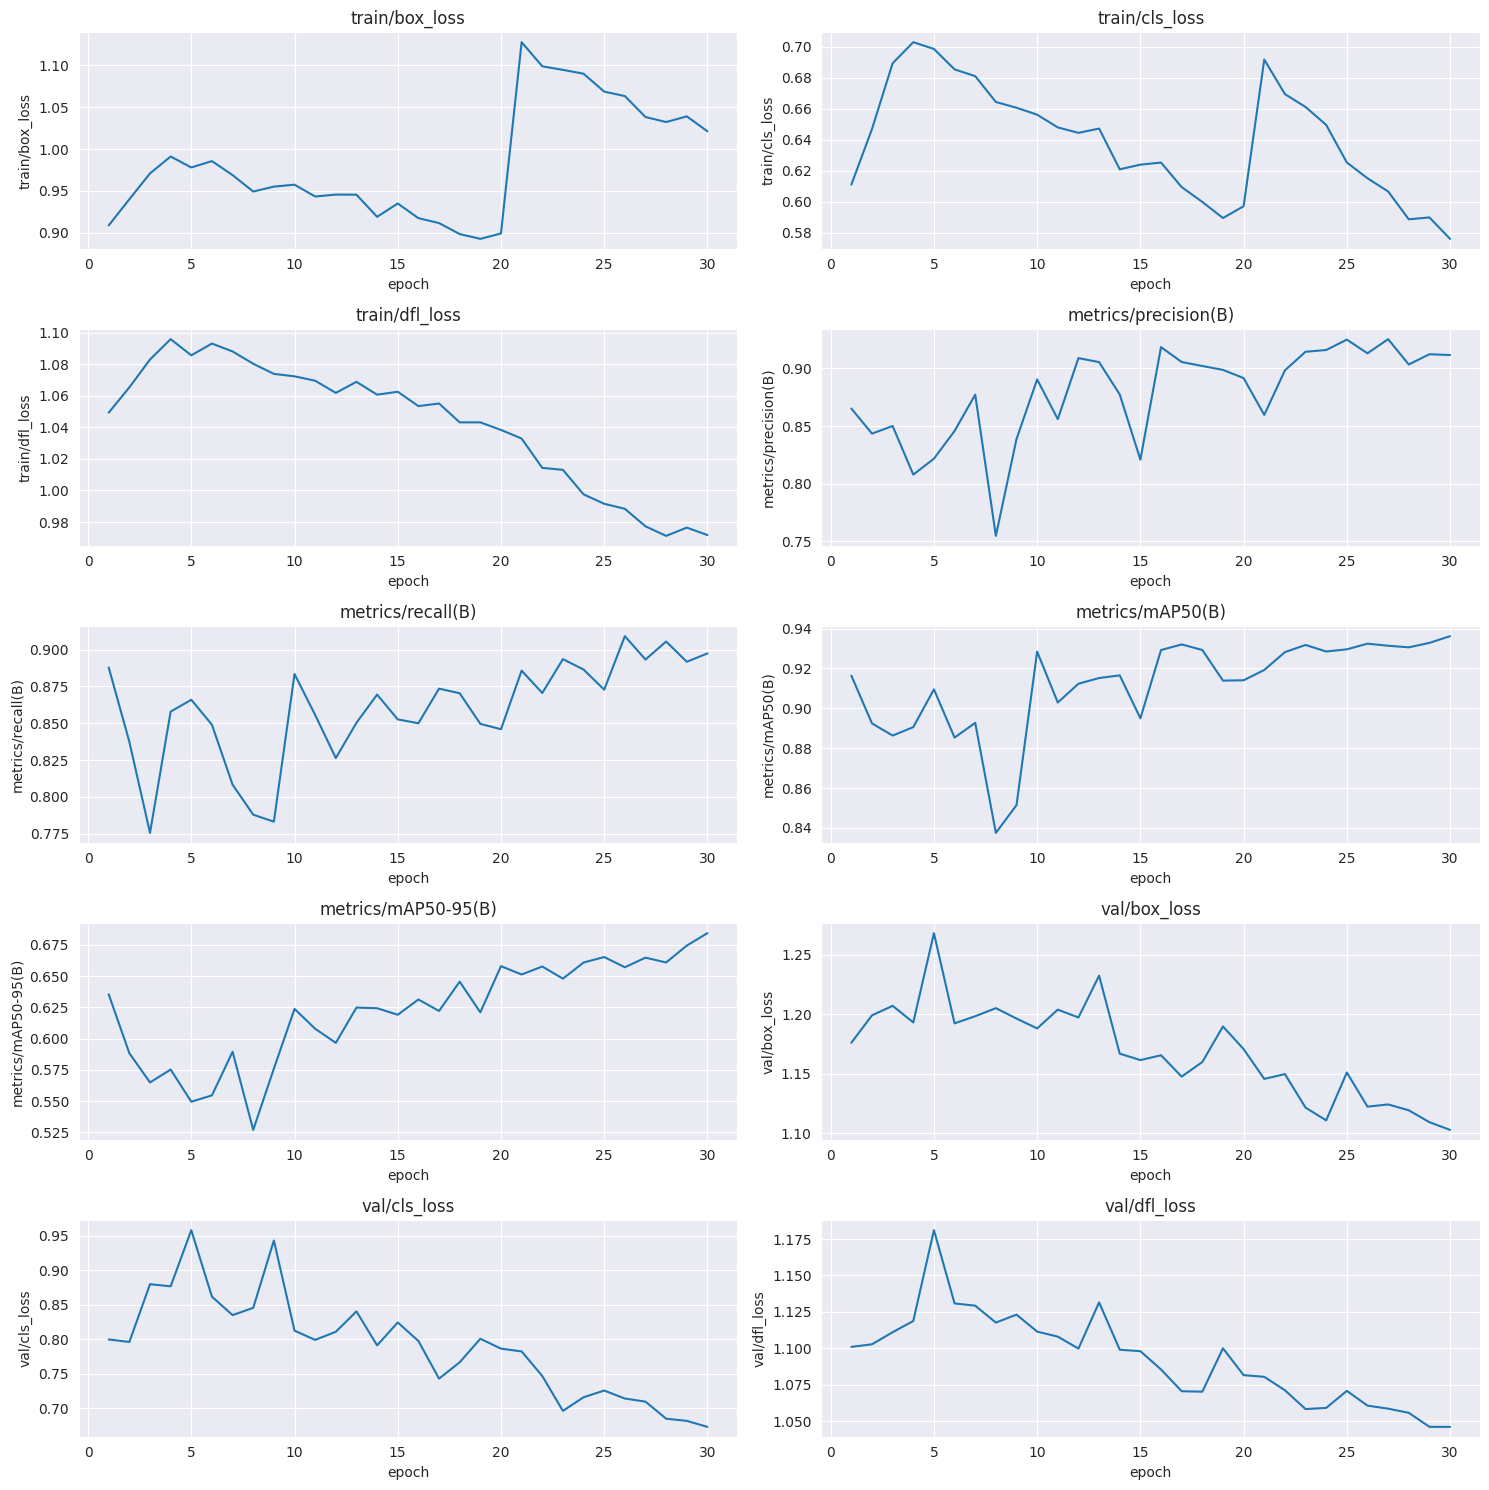

In [ ]:
# Load training metrics
df = pd.read_csv('/content/runs/detect/fine_tune_best/results.csv')

# Create plots for training metrics
fig, axs = plt.subplots(5, 2, figsize=(15, 15))
metrics_to_plot = [
    'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
    'metrics/precision(B)', 'metrics/recall(B)',
    'metrics/mAP50(B)', 'metrics/mAP50-95(B)',
    'val/box_loss', 'val/cls_loss', 'val/dfl_loss'
]

for i, metric in enumerate(metrics_to_plot):
    row, col = divmod(i, 2)
    sns.lineplot(x='epoch', y=metric, data=df, ax=axs[row, col])
    axs[row, col].set_title(metric)

plt.tight_layout()
plt.show()

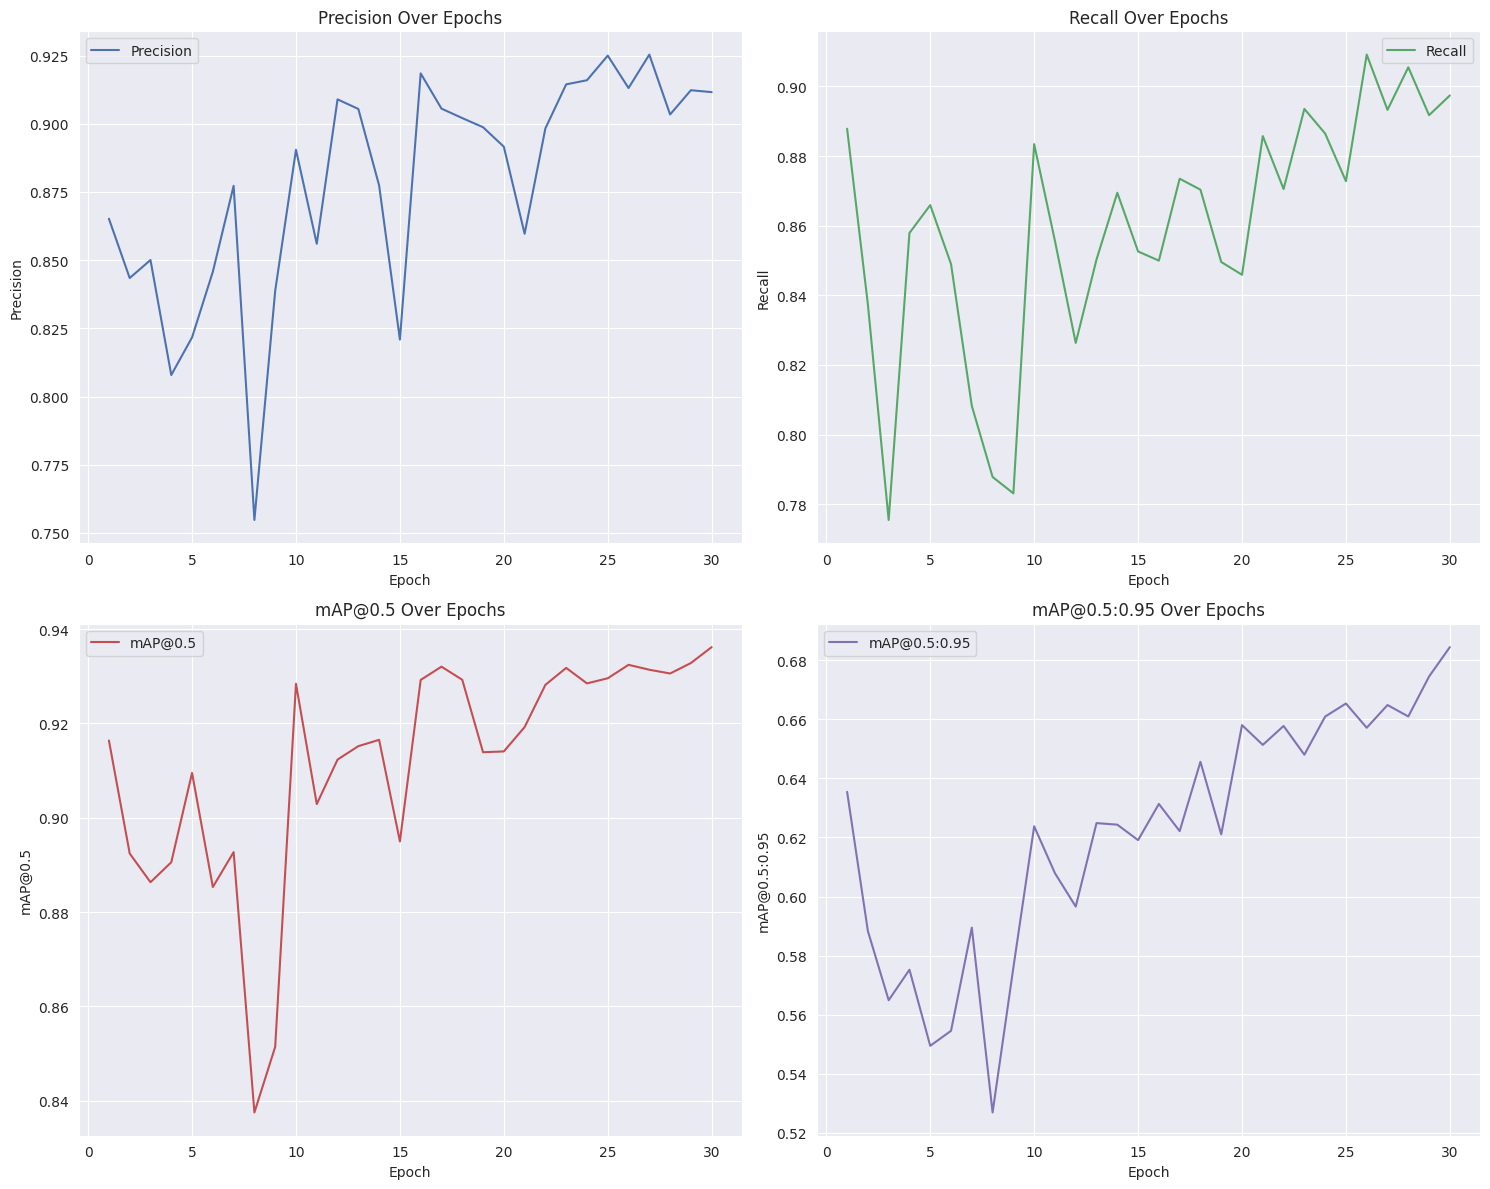

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Correct the path
results_csv_path = "/content/runs/detect/fine_tune_best/results.csv"

# Load and plot metrics
df = pd.read_csv(results_csv_path)

# Plot metrics
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Precision and Recall
axs[0, 0].plot(df["epoch"], df["metrics/precision(B)"], label="Precision", color="b")
axs[0, 0].set_title("Precision Over Epochs")
axs[0, 0].set_xlabel("Epoch")
axs[0, 0].set_ylabel("Precision")
axs[0, 0].legend()

axs[0, 1].plot(df["epoch"], df["metrics/recall(B)"], label="Recall", color="g")
axs[0, 1].set_title("Recall Over Epochs")
axs[0, 1].set_xlabel("Epoch")
axs[0, 1].set_ylabel("Recall")
axs[0, 1].legend()

# mAP@0.5 and mAP@0.5:0.95
axs[1, 0].plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP@0.5", color="r")
axs[1, 0].set_title("mAP@0.5 Over Epochs")
axs[1, 0].set_xlabel("Epoch")
axs[1, 0].set_ylabel("mAP@0.5")
axs[1, 0].legend()

axs[1, 1].plot(df["epoch"], df["metrics/mAP50-95(B)"], label="mAP@0.5:0.95", color="m")
axs[1, 1].set_title("mAP@0.5:0.95 Over Epochs")
axs[1, 1].set_xlabel("Epoch")
axs[1, 1].set_ylabel("mAP@0.5:0.95")
axs[1, 1].legend()

plt.tight_layout()
plt.show()
